Name:-Rajwardhan Sujit Dhumal<br>Class:-TY-IT-CORE<br>Batch:-CORE - 2 <br> Enrolment No.:-MITU22BTIT0063

## Dataset Information


The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


Variable | Description
----------|--------------
Item_Identifier | Unique product ID
Item_Weight | Weight of product
Item_Fat_Content | Whether the product is low fat or not
Item_Visibility | The % of total display area of all products in a    store allocated to the particular product
Item_Type | The category to which the product belongs
Item_MRP | Maximum Retail Price (list price) of the product
Outlet_Identifier | Unique store ID
Outlet_Establishment_Year | The year in which store was established
Outlet_Size | The size of the store in terms of ground area covered
Outlet_Location_Type | The type of city in which the store is located
Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket
Item_Outlet_Sales | Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [1]:
## Required libraries
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
data.info() #it tells range  of index, total columns ,names of columns, Non-Null will give how many entries are there in column
#data imputation is a process where we clean the data and do some operations like min,max

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
data.describe()#it gives only float,int types description and not the object means char type

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


__first task is to adjust empty values__

In [7]:
data.isnull().sum()#it checks how many rows having null values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
#how to check how many items are there
len(data.Item_Identifier.unique())#len gives no. of items,.unique() function gives all unique values

1559

In [10]:
data['Item_Identifier']#it gives series of products

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [11]:
unique_values ={}

In [12]:
for column in data.columns:
    unique_values[column]=len(data[column].unique())
unique_values#kiti unique values aahet pratek mdhe

{'Item_Identifier': 1559,
 'Item_Weight': 416,
 'Item_Fat_Content': 5,
 'Item_Visibility': 7880,
 'Item_Type': 16,
 'Item_MRP': 5938,
 'Outlet_Identifier': 10,
 'Outlet_Establishment_Year': 9,
 'Outlet_Size': 4,
 'Outlet_Location_Type': 3,
 'Outlet_Type': 4,
 'Item_Outlet_Sales': 3493}

In [13]:
data.apply(lambda x : len(x.unique())) #another method to check unique values

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [14]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [15]:
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [16]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [17]:
# data.dropna()  #NA values will not be displayed or it will be deleted

In [18]:
#to retrieve a single column
data.Item_Weight
# or we can also use
data['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [19]:
# to retrieve NULL or NA values
null_weight=data[data["Item_Weight"].isnull()]
null_weight

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


### Will be applying pivoting

### Pivot summarizes the data

In [20]:
#items out of 1559 which have some weight
pivoted_data=data.pivot_table(values='Item_Weight',index='Item_Identifier')#index means on what basis we are doing this
pivoted_data=pivoted_data.reset_index()
pivoted_data
#seeing the output we have 1555 product having associated weight

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1550,NCZ30,6.590
1551,NCZ41,19.850
1552,NCZ42,10.500
1553,NCZ53,9.600


## identifying and locating the missing values

In [21]:
invalid_data=set(data.Item_Identifier.to_list())-set(pivoted_data.Item_Identifier.to_list())
invalid_data

{'FDE52', 'FDK57', 'FDN52', 'FDQ60'}

In [22]:
data.loc[data['Item_Identifier']=='FDN52']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564


In [23]:
#there were 1559 values in all with 4 which were not found anywhere so display the 4
#same as above
set(data.Item_Identifier.to_list())-set(pivoted_data.Item_Identifier.to_list())

{'FDE52', 'FDK57', 'FDN52', 'FDQ60'}

In [24]:
set1=set(data.Item_Identifier)
set2=set(pivoted_data.Item_Identifier)
values_not_displayed_in_pivoted_data=set1-set2
print(values_not_displayed_in_pivoted_data)

{'FDK57', 'FDN52', 'FDE52', 'FDQ60'}


In [25]:
data.loc[data['Item_Identifier']=='FDN52']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564


## To display Qualitative(object) and Quantitative(int64 or float64)

In [26]:
cat_data=[]  #cat=Qualitative(categorical)
num_data=[]  #num=Quantitative(nuerical)
for col in data.columns:
 if data.dtypes[col]=="object":
    cat_data.append(col)
 else:
     num_data.append(col)

In [27]:
cat_data

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [28]:
num_data

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

# create a dictionary  

In [29]:
weight_dict=dict(zip(pivoted_data.Item_Identifier,pivoted_data.Item_Weight))

In [30]:
weight_dict

{'DRA12': 11.6,
 'DRA24': 19.35,
 'DRA59': 8.27,
 'DRB01': 7.39,
 'DRB13': 6.115,
 'DRB24': 8.785,
 'DRB25': 12.3,
 'DRB48': 16.75,
 'DRC01': 5.92,
 'DRC12': 17.85,
 'DRC13': 8.26,
 'DRC24': 17.85,
 'DRC25': 5.73,
 'DRC27': 13.800000000000002,
 'DRC36': 13.0,
 'DRC49': 8.67,
 'DRD01': 12.1,
 'DRD12': 6.96,
 'DRD13': 15.0,
 'DRD15': 10.6,
 'DRD24': 13.85,
 'DRD25': 6.135000000000001,
 'DRD27': 18.75,
 'DRD37': 9.8,
 'DRD49': 9.895,
 'DRD60': 15.7,
 'DRE01': 10.1,
 'DRE03': 19.6,
 'DRE12': 4.59,
 'DRE13': 6.28,
 'DRE15': 13.35,
 'DRE25': 15.35,
 'DRE27': 11.85,
 'DRE37': 13.5,
 'DRE48': 8.43,
 'DRE49': 20.75,
 'DRE60': 9.395,
 'DRF01': 5.655,
 'DRF03': 19.1,
 'DRF13': 12.1,
 'DRF15': 18.35,
 'DRF23': 4.61,
 'DRF25': 9.0,
 'DRF27': 8.93,
 'DRF36': 16.1,
 'DRF37': 17.25,
 'DRF48': 5.73,
 'DRF49': 7.269999999999999,
 'DRF51': 15.75,
 'DRF60': 10.8,
 'DRG01': 14.800000000000002,
 'DRG03': 14.5,
 'DRG11': 6.385,
 'DRG13': 17.25,
 'DRG15': 6.13,
 'DRG23': 8.88,
 'DRG25': 10.5,
 'DRG27': 8.895,

In [31]:
new_data=data[~data['Item_Identifier'].isin(invalid_data)] #to exclude the 4 values ('~' allows u to exclude that values )

# Item_Visibility
#### Some Item's have visibility recorded as 0.0... or basically zero. We will be replacing it the mean of the of the whole field.

In [32]:
new_data['Item_Visibility']=new_data['Item_Visibility'].replace(0,new_data['Item_Visibility'].mean()) # there are some items which have item_visibility as '0' so we replace that 0 witht the mean value

C:\Users\Rajwardhan\AppData\Local\Temp\ipykernel_17644\481141965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Item_Visibility']=new_data['Item_Visibility'].replace(0,new_data['Item_Visibility'].mean()) # there are some items which have item_visibility as '0' so we replace that 0 witht the mean value


In [33]:
#replace the item_weight wherever it is null and match the value in dictionary and apply the associated weight there
if new_data.Item_Weight.isnull().any():
    new_data.loc[new_data.Item_Weight.isnull(),'Item_Weight'] =new_data.loc[new_data.Item_Weight.isnull(),'Item_Identifier'].apply(lambda x:weight_dict[x])

In [34]:
data.loc[data['Item_Identifier']=='DRF49']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
163,DRF49,7.27,Low Fat,0.071078,Soft Drinks,114.2518,OUT046,1997,Small,Tier 1,Supermarket Type1,2618.5914
290,DRF49,7.27,Low Fat,0.071222,Soft Drinks,113.5518,OUT045,2002,NaN,Tier 2,Supermarket Type1,569.2590
1844,DRF49,7.27,Low Fat,0.071188,Soft Drinks,111.9518,OUT049,1999,Medium,Tier 1,Supermarket Type1,1138.5180
4729,DRF49,7.27,Low Fat,0.071367,Soft Drinks,111.8518,OUT018,2009,Medium,Tier 3,Supermarket Type2,2277.0360
4861,DRF49,NaN,Low Fat,0.124448,Soft Drinks,112.0518,OUT019,1985,Small,Tier 1,Grocery Store,113.8518
6759,DRF49,7.27,Low Fat,0.071064,Soft Drinks,114.4518,OUT035,2004,Small,Tier 2,Supermarket Type1,1366.2216


In [35]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                6109 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


# To locate and replace null values of Outlet_Size
__we have to find the highest or most recurring value(small,medium or high) for each type and consider it as associated value for that type__

In [36]:
new_data.Outlet_Type.value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1082
Supermarket Type3     932
Supermarket Type2     928
Name: count, dtype: int64

-----------------------------------------------------------------------------------------------
_For Supermarket type1_

In [37]:
len(new_data[(new_data.Outlet_Type=='Supermarket Type1') & (new_data.Outlet_Size=="High")])

932

In [38]:
len(new_data[(new_data.Outlet_Type=='Supermarket Type1') & (new_data.Outlet_Size=="Medium")])

930

In [39]:
len(new_data[(new_data.Outlet_Type=='Supermarket Type1') & (new_data.Outlet_Size=="Small")])

1860

-----------------------------------------------------------------------------------------------
_For Supermarket type2_

In [40]:
len(new_data[(new_data.Outlet_Type=='Supermarket Type2') & (new_data.Outlet_Size=="High")])

0

In [41]:
len(new_data[(new_data.Outlet_Type=='Supermarket Type2') & (new_data.Outlet_Size=="Medium")])

928

In [42]:
len(new_data[(new_data.Outlet_Type=='Supermarket Type2') & (new_data.Outlet_Size=="Small")])

0

-----------------------------------------------------------------------------------------------
_For Supermarket type3_

In [43]:
len(new_data[(new_data.Outlet_Type=='Supermarket Type3') & (new_data.Outlet_Size=="High")])

0

In [44]:
len(new_data[(new_data.Outlet_Type=='Supermarket Type3') & (new_data.Outlet_Size=="Medium")])

932

In [45]:
len(new_data[(new_data.Outlet_Type=='Supermarket Type3') & (new_data.Outlet_Size=="Small")])

0

-----------------------------------------------------------------------------------------------
_Overall for all 4 (finding mode i.e the most recurring type_

#### Replace grocery store with smalls
#### replace supermarket1, 2 and 3 with the mode (highest size type) in the place where there is nan.

In [46]:
outlet_size_mode=new_data.pivot_table(values='Outlet_Size',columns="Outlet_Type",aggfunc=(lambda x :x.mode()))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [47]:
if new_data.Outlet_Size.isnull().any():
    new_data.loc[new_data.Outlet_Size.isnull(),"Outlet_Size"]=new_data.loc[new_data.Outlet_Size.isnull(),'Outlet_Type'].apply(lambda x:outlet_size_mode[x])

In [48]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [49]:
new_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [50]:
cat_data

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [51]:
cat_data.remove('Item_Identifier')
cat_data.remove('Outlet_Identifier')

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_data:
    new_data[col] = le.fit_transform(new_data[col])

C:\Users\Rajwardhan\AppData\Local\Temp\ipykernel_17644\2644509695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[col] = le.fit_transform(new_data[col])
C:\Users\Rajwardhan\AppData\Local\Temp\ipykernel_17644\2644509695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[col] = le.fit_transform(new_data[col])
C:\Users\Rajwardhan\AppData\Local\Temp\ipykernel_17644\2644509695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [53]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   int32  
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   int32  
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   int32  
 9   Outlet_Location_Type       8519 non-null   int32  
 10  Outlet_Type                8519 non-null   int32  
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int32(5), int64(1), object(2)
memory usage: 698.8+ KB


#### Remove item identifier and outlet indentifier from the categorical array as they don't provide any good bases for the making of a model

In [54]:
X = new_data.drop(columns = ['Item_Identifier','Outlet_Identifier', 'Item_Outlet_Sales','Outlet_Establishment_Year'])
y = new_data['Item_Outlet_Sales']

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [56]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((6815, 8), (1704, 8), (6815,), (1704,))

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
model.predict(X_train)

array([ 734.44155863, 2945.82850895, 1857.25078157, ..., 1518.61548837,
       1625.41694098, 1429.88553743])

In [60]:
model.predict(X_test)

array([1879.83815737, 1894.83991151,   44.51404273, ..., 1621.16183673,
       1365.79583752, 2337.27210479])

In [61]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train , y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)

#Print the mean squared errors
print("Mean Squared Error (Training): ",mse_train)
print("Mean Squared Error (Testing): ",mse_test)

Mean Squared Error (Training):  1453781.1036005004
Mean Squared Error (Testing):  1444082.31186945


### Standard Scaling

In [62]:
#Feature Engineering
from sklearn.preprocessing import StandardScaler

scale= StandardScaler().fit(X)
scaled_x=scale.transform(X)

In [63]:
scaled_x

array([[-0.76959845, -0.73784568, -1.11125833, ..., -0.66414105,
        -1.36922671, -0.25224114],
       [-1.49713327,  1.35529696, -1.04495044, ..., -0.66414105,
         1.09188572,  1.00439176],
       [ 0.99542688, -0.73784568, -1.09663011, ..., -0.66414105,
        -1.36922671, -0.25224114],
       ...,
       [-0.48977736, -0.73784568, -0.71847034, ...,  0.79971862,
        -0.1386705 , -0.25224114],
       [-1.21946466,  1.35529696,  1.53975886, ..., -0.66414105,
         1.09188572,  1.00439176],
       [ 0.41426   , -0.73784568, -0.51956179, ...,  0.79971862,
        -1.36922671, -0.25224114]])

In [64]:
y.ndim

1

In [65]:
scale_y=StandardScaler().fit(np.array(y).reshape((y.shape[0],1)))
scaled_y=scale_y.transform(np.array(y).reshape((y.shape[0],1)))

In [66]:
scaled_y.ndim

2

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Covariance Matrix Calculation

In [68]:
def covariance(x):
    return (x.T @ x)/(x.shape[0]-1)

cov_mat=covariance(scaled_x)
np.cov(cov_mat)

array([[ 0.12517456, -0.02448162, -0.02146404, -0.00525147, -0.01150657,
        -0.00768239, -0.01554214, -0.01451349],
       [-0.02448162,  0.13198641,  0.00085627, -0.05434437, -0.01579107,
        -0.00284272, -0.01582337, -0.014948  ],
       [-0.02146404,  0.00085627,  0.13566036, -0.02549909, -0.01828247,
         0.03684193, -0.04174459, -0.07275848],
       [-0.00525147, -0.05434437, -0.02549909,  0.13172237, -0.00768875,
        -0.00416009, -0.01430456, -0.01244822],
       [-0.01150657, -0.01579107, -0.01828247, -0.00768875,  0.12310048,
        -0.0036997 , -0.01821973, -0.01712686],
       [-0.00768239, -0.00284272,  0.03684193, -0.00416009, -0.0036997 ,
         0.19943406, -0.16779083, -0.15238387],
       [-0.01554214, -0.01582337, -0.04174459, -0.01430456, -0.01821973,
        -0.16779083,  0.190446  ,  0.14628668],
       [-0.01451349, -0.014948  , -0.07275848, -0.01244822, -0.01712686,
        -0.15238387,  0.14628668,  0.18748809]])

In [69]:
from numpy.linalg import eig

eig_vals,eig_vecs=eig(cov_mat)
#max_abd_idx=np.argax(np.abs(eig_vecs),axis=0)
#signs=np.sign(eig_vecs[max_abs_idx,range(eigs_vecs.shape[0])])
#eigs_vecs=eig_vecs*signs[np.newaxis,:]
#eig_vecs=eig_vecs.T

### Eigenvalues and Eigenvectors Calculation


In [70]:
eig_pairs=[(np.abs(eig_vals[i]),eig_vecs[i,:]) for i in range(len(eig_vals))]
eig_pairs


[(1.9325523629544272,
  array([ 0.0139135 ,  0.00112595, -0.02501809,  0.2739337 ,  0.01586449,
          0.52511709,  0.73878395, -0.31990345])),
 (0.48322148300723156,
  array([-0.01126311,  0.02135012,  0.01603691, -0.62958129, -0.69236501,
          0.28521636, -0.04074041, -0.20102256])),
 (0.5899789355259057,
  array([-0.18573753, -0.19450242, -0.13757062, -0.29564789,  0.06753529,
          0.15313422,  0.35262966,  0.8179109 ])),
 (1.1750926070762757,
  array([ 0.0127388 , -0.00920427,  0.00071781,  0.64169543, -0.69299257,
         -0.04585591, -0.05171589,  0.3208792 ])),
 (0.8552099941396211,
  array([ 6.97886694e-04, -4.20904806e-03, -1.56391688e-03,  1.45787080e-01,
          1.85299572e-01,  7.84165424e-01, -5.58974184e-01,  1.30468373e-01])),
 (1.0169583662155268,
  array([-0.55956208,  0.40208499, -0.71281414,  0.0466423 , -0.01514473,
         -0.02710384, -0.05680775, -0.1036694 ])),
 (0.9723645610059,
  array([ 0.57657612,  0.77157916, -0.06463458, -0.07705786,  0.02

In [71]:
cov_mat

array([[ 1.00011740e+00, -2.68007276e-02, -1.74847572e-02,
         3.57041477e-02,  2.59778010e-02, -1.24264385e-02,
         2.93797451e-03,  5.37333639e-04],
       [-2.68007276e-02,  1.00011740e+00,  4.95184198e-02,
        -1.38948681e-01,  6.35885836e-03, -1.23610136e-03,
        -1.63467701e-03,  1.91899188e-03],
       [-1.74847572e-02,  4.95184198e-02,  1.00011740e+00,
        -3.55618024e-02, -5.11517239e-03,  9.74186467e-02,
        -2.75646566e-02, -1.79622924e-01],
       [ 3.57041477e-02, -1.38948681e-01, -3.55618024e-02,
         1.00011740e+00,  3.25296499e-02, -5.12220886e-05,
         2.80081941e-03,  2.73334761e-03],
       [ 2.59778010e-02,  6.35885836e-03, -5.11517239e-03,
         3.25296499e-02,  1.00011740e+00,  7.42850190e-04,
         4.42793631e-04, -1.49180131e-03],
       [-1.24264385e-02, -1.23610136e-03,  9.74186467e-02,
        -5.12220886e-05,  7.42850190e-04,  1.00011740e+00,
        -4.79956515e-01, -4.01210425e-01],
       [ 2.93797451e-03, -1.634677

In [72]:
eig_vals.shape

(8,)

In [73]:
eig_vecs.shape

(8, 8)

In [74]:
eig_pairs.sort(reverse=True)

In [75]:
eig_pairs[0][0]

1.9325523629544272

In [76]:
[x[1] for x in eig_pairs]

[array([ 0.0139135 ,  0.00112595, -0.02501809,  0.2739337 ,  0.01586449,
         0.52511709,  0.73878395, -0.31990345]),
 array([ 0.0127388 , -0.00920427,  0.00071781,  0.64169543, -0.69299257,
        -0.04585591, -0.05171589,  0.3208792 ]),
 array([-0.55956208,  0.40208499, -0.71281414,  0.0466423 , -0.01514473,
        -0.02710384, -0.05680775, -0.1036694 ]),
 array([ 0.56521555, -0.45233012, -0.68403702, -0.00630294, -0.01823076,
        -0.0203053 , -0.04673941, -0.07108605]),
 array([ 0.57657612,  0.77157916, -0.06463458, -0.07705786,  0.02610825,
         0.03589545,  0.08747831,  0.22910139]),
 array([ 6.97886694e-04, -4.20904806e-03, -1.56391688e-03,  1.45787080e-01,
         1.85299572e-01,  7.84165424e-01, -5.58974184e-01,  1.30468373e-01]),
 array([-0.18573753, -0.19450242, -0.13757062, -0.29564789,  0.06753529,
         0.15313422,  0.35262966,  0.8179109 ]),
 array([-0.01126311,  0.02135012,  0.01603691, -0.62958129, -0.69236501,
         0.28521636, -0.04074041, -0.2010

### Sorting Eigenvalues and Selecting Top k Eigenvectors


In [77]:
sorted_eig_values=np.array([x[0] for x in eig_pairs])
sorted_eig_vectors=np.array([x[1] for x in eig_pairs])

In [78]:
#select top k eigen vectors
k=2 #components u want to retain
w=sorted_eig_vectors[:k,:]

In [79]:
total_eig_val=sum(sorted_eig_values)
total_eig_val

8.00093918760273

# The explained variance for each eigenvalue is calculated as the proportion of the

In [80]:
explained_variance=[(i/total_eig_val)*100 for i in sorted_eig_values]
explained_variance=np.round(explained_variance,2)
cum_explained_variance=np.cumsum(explained_variance)

print("Explained variance: {}".format(explained_variance))
print("Cumulative explained variance: {}".format(cum_explained_variance))

Explained variance: [24.15 14.69 12.71 12.19 12.15 10.69  7.37  6.04]
Cumulative explained variance: [24.15 38.84 51.55 63.74 75.89 86.58 93.95 99.99]


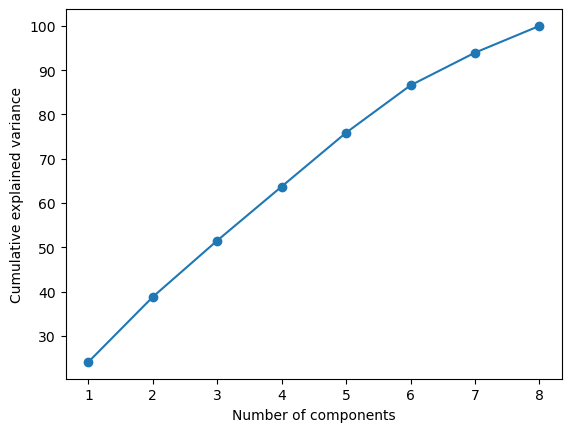

In [81]:
n_sample,n_features=scaled_x.shape
import matplotlib.pyplot as plt
plt.plot(np.arange(1,n_features+1),cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

### PCA with Scikit-learn and Dimensionality Reduction


Components: 
  [[-0.0139135   0.01126311  0.18573753 -0.0127388  -0.00069789  0.55956208
  -0.57657612 -0.56521555]
 [-0.2739337   0.62958129  0.29564789 -0.64169543 -0.14578708 -0.0466423
   0.07705786  0.00630294]]
Explained variance ratio: 
, [0.24154069 0.14686933]
Cumulative explained variance: 
 [0.24154069 0.38841002]
Transformed data shape: (8519, 2)


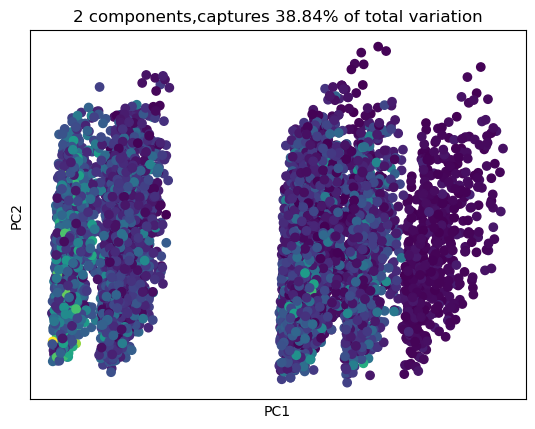

In [82]:
#from skLearn.preprocessing import StandardScaler
#x_std=StandardScaler().fit_trnasfrom(X)

from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(scaled_x)

print("Components: \n ",pca.components_)
print('Explained variance ratio: \n,',pca.explained_variance_ratio_)

cum_explained_variance=np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance: \n',cum_explained_variance)

X_pca=pca.transform(scaled_x) #Apply dimensionality reduction to X
print('Transformed data shape:',X_pca.shape)

plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.xlabel('PC1');plt.xticks([])
plt.ylabel('PC2');plt.yticks([])
plt.title('2 components,captures {}% of total variation'.format(cum_explained_variance[1].round(4)*100))
plt.show()